<a href="https://colab.research.google.com/github/Sona-Kolanu/PandasNotes.py/blob/main/PandasNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Notes**

Concise notes for quick reference on pandas and matplotlib.

Topics Covered:


1.   Pandas: DataFrames,Series and basic operations
2.   Matplotlib: Basic plots and visualizations



In [1]:
import pandas as pd
s=pd.Series([1,2,3,4])
print(s)

0    1
1    2
2    3
3    4
dtype: int64


In [2]:
import pandas as pd
data={
    "Name":["Sona","Sreeja","Kavya","Aishwarya","Akhila","Chandhana"],
    "Age":[23,23,21,20,25,18],
    "Place":["Hyderabad","Nirmal","Khammam","vijayawada","Guntur","Nalgonda"]
}
df=pd.DataFrame(data)
print(df)
print(type(df))

        Name  Age       Place
0       Sona   23   Hyderabad
1     Sreeja   23      Nirmal
2      Kavya   21     Khammam
3  Aishwarya   20  vijayawada
4     Akhila   25      Guntur
5  Chandhana   18    Nalgonda
<class 'pandas.core.frame.DataFrame'>


#functions:
df.head()--> first 5 rows

df.tail()--> last 5 rows

df.shape--> no.of rows and columns

df.info()--> quick summary of the dataframe(it gives columns names,data type,memory usage,non-null values,no.of rows/columns)

df.describe()-->gives statistical summary of numeric columns

In [3]:
df.head()
df.tail()
df.shape
df.info()
df.describe()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6 non-null      object
 1   Age     6 non-null      int64 
 2   Place   6 non-null      object
dtypes: int64(1), object(2)
memory usage: 276.0+ bytes
        Name  Age       Place
0       Sona   23   Hyderabad
1     Sreeja   23      Nirmal
2      Kavya   21     Khammam
3  Aishwarya   20  vijayawada
4     Akhila   25      Guntur
5  Chandhana   18    Nalgonda


# **Data Selection and Indexing**






---




In [4]:
print(df["Name"])
print(type(df["Name"]))
print(df[["Name","Place"]])
print(df["Name"][1])
print(df.loc[1])
df.loc[1,"Age"]=22
print(df.iloc[0:2])
print(df.iloc[2,1])

#iloc works with numbers only-------> end is exclusive and start with 0-based
#loc works with names,booleans,slices ----> end is inclusive and start with actual index labels

0         Sona
1       Sreeja
2        Kavya
3    Aishwarya
4       Akhila
5    Chandhana
Name: Name, dtype: object
<class 'pandas.core.series.Series'>
        Name       Place
0       Sona   Hyderabad
1     Sreeja      Nirmal
2      Kavya     Khammam
3  Aishwarya  vijayawada
4     Akhila      Guntur
5  Chandhana    Nalgonda
Sreeja
Name     Sreeja
Age          23
Place    Nirmal
Name: 1, dtype: object
     Name  Age      Place
0    Sona   23  Hyderabad
1  Sreeja   22     Nirmal
21


In [5]:
print(df.loc[df["Age"]>22])
#or
print(df[df["Age"]>22])
print(df[df["Place"]=="vijayawada"])
print(df[(df["Name"]=="Sona") | (df["Age"]==22)])

     Name  Age      Place
0    Sona   23  Hyderabad
4  Akhila   25     Guntur
     Name  Age      Place
0    Sona   23  Hyderabad
4  Akhila   25     Guntur
        Name  Age       Place
3  Aishwarya   20  vijayawada
     Name  Age      Place
0    Sona   23  Hyderabad
1  Sreeja   22     Nirmal


 # **DATA CLEANING**

---


Data cleaning means fixing the NaN values,duplicates,wrong datatypes and unwanted data in datasets

In [6]:
import pandas as pd
data = {
    "Name": ["Sona", "Rahul", "Priya", None],
    "Age": [23, None, 22, 28],
    "City": ["Hyderabad", "Vizag", None, "Hyderabad"]
}

df = pd.DataFrame(data)
print("Original Data:\n", df)

Original Data:
     Name   Age       City
0   Sona  23.0  Hyderabad
1  Rahul   NaN      Vizag
2  Priya  22.0       None
3   None  28.0  Hyderabad


Finding Missing Value

In [7]:
print(df.isnull())  #or isna()---->True if value is NaN
print(df.isnull().sum()) #Count missing per column

    Name    Age   City
0  False  False  False
1  False   True  False
2  False  False   True
3   True  False  False
Name    1
Age     1
City    1
dtype: int64


Filling Missing Value

In [8]:
df["Name"]=df["Name"].fillna("Unknown")
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["City"]=df["City"].fillna(df["City"].mode()[0])  #mode-->frequent city,always use [0]to fill missing values — it avoids ambiguity and works even when there are multiple modes.
print(df)

      Name        Age       City
0     Sona  23.000000  Hyderabad
1    Rahul  24.333333      Vizag
2    Priya  22.000000  Hyderabad
3  Unknown  28.000000  Hyderabad


In [9]:
df_drop=df.dropna()# removes the rows that containing any NaN
print(df_drop)

      Name        Age       City
0     Sona  23.000000  Hyderabad
1    Rahul  24.333333      Vizag
2    Priya  22.000000  Hyderabad
3  Unknown  28.000000  Hyderabad


Remove Duplicates

In [10]:
df2=pd.DataFrame({
    "name":["Sona","Sreeja","Kavya","Sreeja","Kavya","Sona"],
    "age":[23,23,21,20,25,18]
})
print(df2)
df2=df2.drop_duplicates()
#or
df2=df2.drop_duplicates(subset="name")
print(df2)

     name  age
0    Sona   23
1  Sreeja   23
2   Kavya   21
3  Sreeja   20
4   Kavya   25
5    Sona   18
     name  age
0    Sona   23
1  Sreeja   23
2   Kavya   21


Change data types

In [11]:
df2["age"]=df2["age"].astype(int) #changing the data type of the age column to int.
print(df2.dtypes) #Use type() → to know what kind of Python object you’re dealing with.
                  #Use .dtypes → to inspect data types of DataFrame columns.

name    object
age      int64
dtype: object


Example for practice

In [12]:
import pandas as pd
import numpy as np

data = {
    "Name": ["Anu", "Raj", "Anu", None, "Teja", "Kiran", "Raj", "Ravi"],
    "Age": [25, "30", None, 28, "26", 30, None, "Twenty"],
    "City": ["Chennai", "Hyderabad", "Chennai", "Hyderabad", None, "Vizag", "Hyderabad", "Vizag"],
    "Salary": [55000, None, 55000, None, 40000, 70000, 60000, None]
}

df = pd.DataFrame(data)
print(df)

    Name     Age       City   Salary
0    Anu      25    Chennai  55000.0
1    Raj      30  Hyderabad      NaN
2    Anu    None    Chennai  55000.0
3   None      28  Hyderabad      NaN
4   Teja      26       None  40000.0
5  Kiran      30      Vizag  70000.0
6    Raj    None  Hyderabad  60000.0
7   Ravi  Twenty      Vizag      NaN


In [13]:
df["Name"]=df["Name"].fillna("Unkown")
#If Pandas finds a value it cannot convert to a number (like "twenty" or "abc"), instead of throwing an error,
#it forces it to become NaN (missing value).
#coerce" = force conversion, even if it means making some values missing.
df["Age"]=pd.to_numeric(df["Age"], errors="coerce")
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["City"]=df["City"].fillna("Unknown")
df["Salary"]=df["Salary"].fillna(df["Salary"].median())
df.drop_duplicates()
df["Salary"]=df["Salary"].astype(int)
print(df)

     Name   Age       City  Salary
0     Anu  25.0    Chennai   55000
1     Raj  30.0  Hyderabad   55000
2     Anu  27.8    Chennai   55000
3  Unkown  28.0  Hyderabad   55000
4    Teja  26.0    Unknown   40000
5   Kiran  30.0      Vizag   70000
6     Raj  27.8  Hyderabad   60000
7    Ravi  27.8      Vizag   55000


# **DATA MANIPULATION**


---


**SORTING AND APPLYING**

We can sort the data by column values or by index

In [14]:
import pandas as pd

data = {
    "Name": ["Anu", "Raj", "Teja", "Kiran"],
    "Age": [25, 30, 26, 28],
    "Salary": [55000, 60000, 40000, 70000]
}

df = pd.DataFrame(data)
print(df)

    Name  Age  Salary
0    Anu   25   55000
1    Raj   30   60000
2   Teja   26   40000
3  Kiran   28   70000


sort by columns

In [15]:
#sort by age in ascending order
print(df.sort_values(by="Age"))

#sort by salary in descending order
print(df.sort_values(by="Salary",ascending=False))

    Name  Age  Salary
0    Anu   25   55000
2   Teja   26   40000
3  Kiran   28   70000
1    Raj   30   60000
    Name  Age  Salary
3  Kiran   28   70000
1    Raj   30   60000
0    Anu   25   55000
2   Teja   26   40000


sort by multiple columns

In [16]:
print(df.sort_values(by=["Age","Salary"],ascending=[True,False]))

    Name  Age  Salary
0    Anu   25   55000
2   Teja   26   40000
3  Kiran   28   70000
1    Raj   30   60000


Applying Functions to data

*sometimes we want to modify data using formulas or custom logic*

.apply()--->column/row level,Works on DataFrame or Series.
If used on a DataFrame → applies a function to each column or row (axis=0 for column, axis=1 for row).

If used on a Series → applies the function to each element in that Series.                  

.map()--->Series level(single column),Works only on Series.

.applymap()--->entire DataFrame ,Works only on DataFrames.

In [17]:
#Increase all salaries by 10%

df["Salary"]=df["Salary"].apply(lambda x:x*1.10)
print(df)

# Original DataFrame (after salary increase)
print("DataFrame after salary increase:\n", df)

# Select only numeric columns for row-wise operations
numeric_df = df[['Age', 'Salary']]

# Calculate the sum of numeric columns for each row
row_sum = numeric_df.apply(np.sum, axis=1)
print(row_sum)

column_sum=numeric_df.apply(np.sum,axis=0)
print(column_sum)

    Name  Age   Salary
0    Anu   25  60500.0
1    Raj   30  66000.0
2   Teja   26  44000.0
3  Kiran   28  77000.0
DataFrame after salary increase:
     Name  Age   Salary
0    Anu   25  60500.0
1    Raj   30  66000.0
2   Teja   26  44000.0
3  Kiran   28  77000.0
0    60525.0
1    66030.0
2    44026.0
3    77028.0
dtype: float64
Age          109.0
Salary    247500.0
dtype: float64


In [18]:
#add "Mr./Ms." before each name
df["Name"]=df["Name"].map(lambda x:"Mr./Ms."+x)
print(df)

 # Convert names to uppercase
df["Name"] = df["Name"].map(str.upper)
print(df)

           Name  Age   Salary
0    Mr./Ms.Anu   25  60500.0
1    Mr./Ms.Raj   30  66000.0
2   Mr./Ms.Teja   26  44000.0
3  Mr./Ms.Kiran   28  77000.0
           Name  Age   Salary
0    MR./MS.ANU   25  60500.0
1    MR./MS.RAJ   30  66000.0
2   MR./MS.TEJA   26  44000.0
3  MR./MS.KIRAN   28  77000.0


In [19]:
#Convert all values to string

print(df.applymap(str))

           Name Age             Salary
0    MR./MS.ANU  25  60500.00000000001
1    MR./MS.RAJ  30            66000.0
2   MR./MS.TEJA  26            44000.0
3  MR./MS.KIRAN  28            77000.0


/tmp/ipython-input-904572409.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(str))


**Pandas String Operations**

In [20]:
import pandas as pd

data = {
    "Name": ["  Anu  ", "Raj", "TEJA", "kiran", "Ravi Kumar"],
    "City": ["Hyderabad", "chennai", "VIZAG", "mumbai", "HYDERABAD"]
}

df = pd.DataFrame(data)
print(df)

         Name       City
0       Anu    Hyderabad
1         Raj    chennai
2        TEJA      VIZAG
3       kiran     mumbai
4  Ravi Kumar  HYDERABAD


Common String Functions

In [21]:
print(df["Name"].str.upper())
print(df["Name"].str.lower())
print(df["Name"].str.title())

0         ANU  
1           RAJ
2          TEJA
3         KIRAN
4    RAVI KUMAR
Name: Name, dtype: object
0         anu  
1           raj
2          teja
3         kiran
4    ravi kumar
Name: Name, dtype: object
0         Anu  
1           Raj
2          Teja
3         Kiran
4    Ravi Kumar
Name: Name, dtype: object


In [22]:
df["Name"].str.strip()
df["Name"].str.lstrip()
df["Name"].str.rstrip()
print(df)

         Name       City
0       Anu    Hyderabad
1         Raj    chennai
2        TEJA      VIZAG
3       kiran     mumbai
4  Ravi Kumar  HYDERABAD


In [23]:
print(df["Name"].str.len())

0     7
1     3
2     4
3     5
4    10
Name: Name, dtype: int64


In [24]:
print(df["City"].str.contains("Hyderabad",case=False))
print(df["City"].str.startswith("H"))
print(df["City"].str.endswith("ad"))

0     True
1    False
2    False
3    False
4     True
Name: City, dtype: bool
0     True
1    False
2    False
3    False
4     True
Name: City, dtype: bool
0     True
1    False
2    False
3    False
4    False
Name: City, dtype: bool


In [25]:
df["City"]=df["City"].str.replace("Hyderabad","HYD",case=False)
print(df)

         Name     City
0       Anu        HYD
1         Raj  chennai
2        TEJA    VIZAG
3       kiran   mumbai
4  Ravi Kumar      HYD



**regex filtering**

used with .str.contains()

.str.extract()

.str.replace()

Useful Regex Patterns

^Ra → starts with "Ra"

a$ → ends with "a"

[0-9]+ → numbers only

[A-Za-z]{5} → exactly 5 letters

\d{10} → 10-digit number (phone)

In [26]:
import pandas as pd

data = {"Name":["Anu","Rajesh","Teja","Ravi","Anjali","Ram"]}
df = pd.DataFrame(data)

# Names starting with 'Ra'
print(df[df["Name"].str.contains(r"^Ra")])

# Extract only alphabets of length 3
print(df["Name"].str.extract(r"([A-Za-z]{3})"))

# Replace all vowels with '*'
df["Masked"] = df["Name"].str.replace(r"[aeiouAEIOU]", "*", regex=True)
print(df)

     Name
1  Rajesh
3    Ravi
5     Ram
     0
0  Anu
1  Raj
2  Tej
3  Rav
4  Anj
5  Ram
     Name  Masked
0     Anu     *n*
1  Rajesh  R*j*sh
2    Teja    T*j*
3    Ravi    R*v*
4  Anjali  *nj*l*
5     Ram     R*m


# **Grouping and Aggregation**

---



By using GroupBy method we can divide the data into groups and we can perform aggregate functions such as max,min,count,sum,avg.

In [27]:
import pandas as pd

data = {
    "Name": ["Anu", "Raj", "Teja", "Kiran", "Ravi", "Pooja"],
    "Department": ["IT", "HR", "IT", "Finance", "Finance", "HR"],
    "Salary": [50000, 60000, 55000, 70000, 65000, 58000],
    "Experience": [2, 5, 3, 7, 4, 3]
}

df = pd.DataFrame(data)
print(df)

    Name Department  Salary  Experience
0    Anu         IT   50000           2
1    Raj         HR   60000           5
2   Teja         IT   55000           3
3  Kiran    Finance   70000           7
4   Ravi    Finance   65000           4
5  Pooja         HR   58000           3


Basic groupby

In [28]:
#groupby department and get average salary
print(df.groupby("Department")["Salary"].mean())
#groupby department and get max experience
print(df.groupby("Department")["Experience"].max())

Department
Finance    67500.0
HR         59000.0
IT         52500.0
Name: Salary, dtype: float64
Department
Finance    7
HR         5
IT         3
Name: Experience, dtype: int64


Multiple Aggregations

In [29]:
#for each department: get min,max,mean
print(df.groupby("Department")["Salary"].agg(["min","max","mean"]))

              min    max     mean
Department                       
Finance     65000  70000  67500.0
HR          58000  60000  59000.0
IT          50000  55000  52500.0


group by multiple columns

In [30]:
print(df.groupby(["Department","Experience"])["Salary"].mean())

Department  Experience
Finance     4             65000.0
            7             70000.0
HR          3             58000.0
            5             60000.0
IT          2             50000.0
            3             55000.0
Name: Salary, dtype: float64


Reset Index

In [31]:
result=df.groupby("Department")["Salary"].mean().reset_index()
print(result)

  Department   Salary
0    Finance  67500.0
1         HR  59000.0
2         IT  52500.0


Sorting GroupBy Result

In [32]:
result=df.groupby("Department")["Salary"].mean().sort_values(ascending=False)
print(result)

Department
Finance    67500.0
HR         59000.0
IT         52500.0
Name: Salary, dtype: float64


# **MERGING AND JOINING**

Concatination---------->used to add rows/columns

merge(SQL-style joins)----------->same like SQL joins

join()----------->mostly works on index-based

In [33]:
import pandas as pd

# Two DataFrames
df1 = pd.DataFrame({"ID":[1,2,3], "Name":["Anu","Raj","Teja"]})
df2 = pd.DataFrame({"ID":[4,5], "Name":["Kiran","Ravi"]})

# Row-wise (default axis=0)
print(pd.concat([df1, df2]))

# Column-wise (axis=1)
df3 = pd.DataFrame({"Salary":[50000,60000,55000]})
print(pd.concat([df1, df3], axis=1))

   ID   Name
0   1    Anu
1   2    Raj
2   3   Teja
0   4  Kiran
1   5   Ravi
   ID  Name  Salary
0   1   Anu   50000
1   2   Raj   60000
2   3  Teja   55000


In [34]:
df1 = pd.DataFrame({"ID":[1,2,3], "Name":["Anu","Raj","Teja"]})
df2 = pd.DataFrame({"ID":[1,2,4], "Salary":[50000,60000,70000]})

# Inner Join (only matching IDs)
print(pd.merge(df1, df2, on="ID", how="inner"))

# Left Join (all from df1)
print(pd.merge(df1, df2, on="ID", how="left"))

# Right Join (all from df2)
print(pd.merge(df1, df2, on="ID", how="right"))

# Outer Join (all from both)
print(pd.merge(df1, df2, on="ID", how="outer"))

   ID Name  Salary
0   1  Anu   50000
1   2  Raj   60000
   ID  Name   Salary
0   1   Anu  50000.0
1   2   Raj  60000.0
2   3  Teja      NaN
   ID Name  Salary
0   1  Anu   50000
1   2  Raj   60000
2   4  NaN   70000
   ID  Name   Salary
0   1   Anu  50000.0
1   2   Raj  60000.0
2   3  Teja      NaN
3   4   NaN  70000.0


In [35]:
df1 = pd.DataFrame({"Name":["Anu","Raj","Teja"]}, index=[1,2,3])
df2 = pd.DataFrame({"Salary":[50000,60000,55000]}, index=[1,2,4])

print(df1.join(df2, how="inner"))   # only index match
print(df1.join(df2, how="outer"))   # all indexes

  Name  Salary
1  Anu   50000
2  Raj   60000
   Name   Salary
1   Anu  50000.0
2   Raj  60000.0
3  Teja      NaN
4   NaN  55000.0


**Time series and date handling**

In [36]:
import pandas as pd

data = {"Date":["2023-01-01","2023-02-15","2023-03-10"],
        "Sales":[100,200,150]}
df = pd.DataFrame(data)

# Convert to datetime
df["Date"] = pd.to_datetime(df["Date"])
print(df.dtypes)

Date     datetime64[ns]
Sales             int64
dtype: object


Extracting date parts

In [37]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
print(df)

        Date  Sales  Year  Month  Day
0 2023-01-01    100  2023      1    1
1 2023-02-15    200  2023      2   15
2 2023-03-10    150  2023      3   10


Filtering with dates

In [38]:
# Sales after Feb 2023
print(df[df["Date"] > "2023-02-01"])


        Date  Sales  Year  Month  Day
1 2023-02-15    200  2023      2   15
2 2023-03-10    150  2023      3   10


Setting date as index

In [39]:

df = df.set_index("Date")
print(df)

            Sales  Year  Month  Day
Date                               
2023-01-01    100  2023      1    1
2023-02-15    200  2023      2   15
2023-03-10    150  2023      3   10


**Rolling Window**-----------> sliding subset of data,on which we apply mean/sum/max etc.It handles the fluctuations smoothly.

In [40]:
import pandas as pd

data = {"Sales":[100,120,130,90,150,200,170,180,160,140]}
df = pd.DataFrame(data)

# Rolling mean (3 window)
df["Rolling_Mean"] = df["Sales"].rolling(window=3).mean()
print(df)

   Sales  Rolling_Mean
0    100           NaN
1    120           NaN
2    130    116.666667
3     90    113.333333
4    150    123.333333
5    200    146.666667
6    170    173.333333
7    180    183.333333
8    160    170.000000
9    140    160.000000


# **Pandas Visualization**

It plots the graph based on the data(series or dataframe) by using df.plot() method.

It internally uses the matplotlib

In this we are going to have

-->Line Plot(default) -- It deals with continuous data (sales year by year,temperature hourly)

-->Barplot -- used for compare categories (population in cities)

-->Histogram -- deals with distribution of values (student marks distribution,salaries in company)

-->Scatterplot -- relation between 2 variables (height vs weight, sales vs profit)

-->Box plot-- a quick summary of the data or to quickly see how the data is spread and if there are any unusual values(outliers)


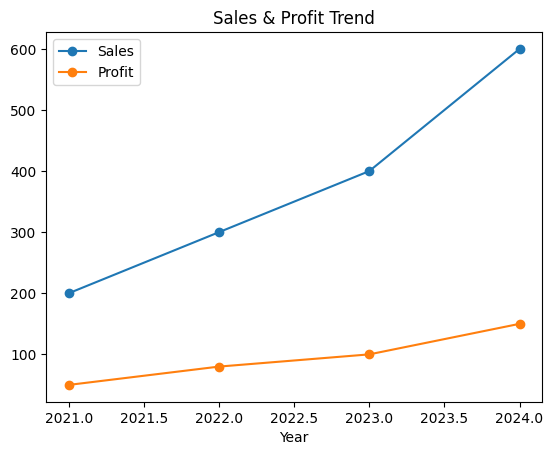

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Year": [2021, 2022, 2023, 2024],
    "Sales": [200, 300, 400, 600],
    "Profit": [50, 80, 100, 150]
}
df = pd.DataFrame(data)

# Line plot
df.plot(x="Year", y=["Sales","Profit"], kind="line", marker="o")
plt.title("Sales & Profit Trend")
plt.show()

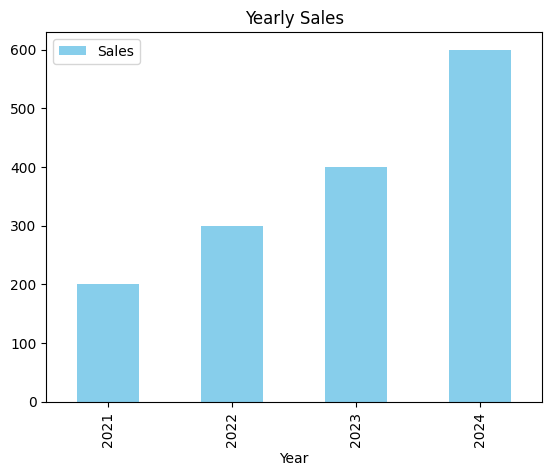

In [42]:
#barplot
df.plot(x="Year", y="Sales", kind="bar", color="skyblue")
plt.title("Yearly Sales")
plt.show()

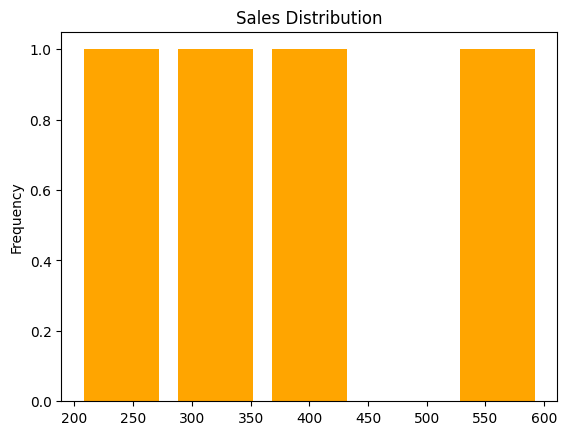

In [43]:
#histogram
df["Sales"].plot(kind="hist", bins=5, color="orange", rwidth=0.8)
plt.title("Sales Distribution")
plt.show()

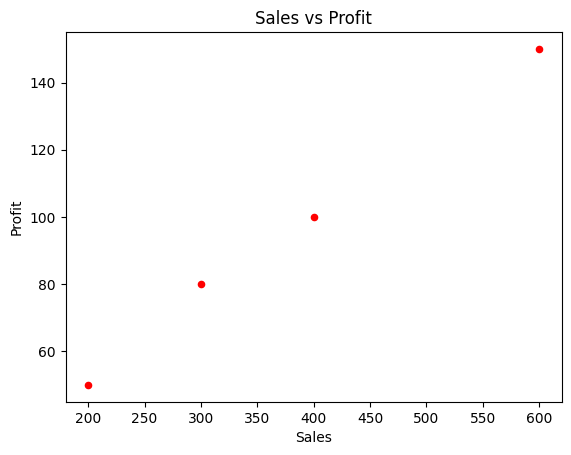

In [44]:
#scatterplot
df.plot(x="Sales", y="Profit", kind="scatter", color="red")
plt.title("Sales vs Profit")
plt.show()

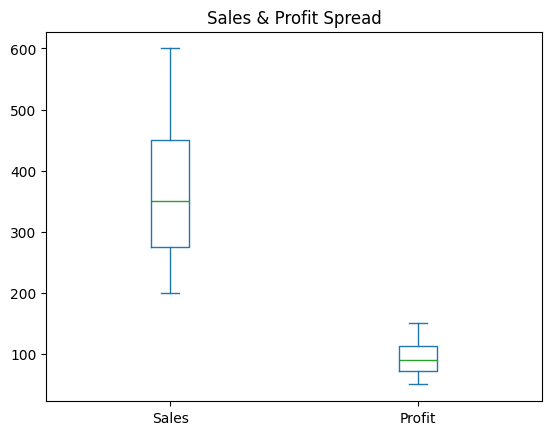

In [45]:
#boxplot
df[["Sales","Profit"]].plot(kind="box")
plt.title("Sales & Profit Spread")
plt.show()